# Описание проекта
Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

**Цели:**
* Приоритизировать гипотезы;
* Проанализовать результаты А/В теста.

**Задачи:**

1.	Построить график кумулятивной выручки по группам.
2.	Построить график кумулятивного среднего чека по группам. 
3.	Построить график относительного изменения кумулятивного среднего чека группы B к группе A.
4.	Построить график кумулятивной конверсии по группам.
5.	Построить график относительного изменения кумулятивной конверсии группы B к группе A.
6.	Построить точечный график количества заказов по пользователям.
7.	Посчитать 95-й и 99-й перцентили количества заказов на пользователя.
8.	Построить точечный график стоимостей заказов. 
9.	Посчитать 95-й и 99-й перцентили стоимости заказов.
10.	Посчитать статистическую значимость различий в конверсии между группами по «сырым» данным.
11.	Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.
12.	Посчитать статистическую значимость различий в конверсии между группами по «очищенным» данным.
13.	Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. 
14.	Принять решение по результатам теста и объясните его.


# Импорт библиотек и загрузка данных

Импортируем необходимые бибилиотеки для дальнейшей работы и подругрузим данные в переменные.

In [1]:
#импортируем необходимые библиотеки для анализа
import pandas as pd
from matplotlib import pyplot as plt
import datetime as dt
import scipy.stats as stats
import numpy as np
import warnings
warnings.simplefilter('ignore')
pd.set_option('display.max_colwidth', None)

In [2]:
#загрузим данные в переменные
try:
    hypothesis = pd.read_csv('../8 project/datasets/hypothesis.csv')
    orders = pd.read_csv('../8 project/orders.csv') 
    visitors = pd.read_csv('../8 project/visitors.csv')
except: 
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')
    orders = pd.read_csv('/datasets/orders.csv')
    visitors = pd.read_csv('/datasets/visitors.csv')

## Приоритизация гипотез

Выведем на экран датасет `hypothesis`:

In [3]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Видим проблему написания названия колонок, приведем к *lower_case*.

In [4]:
hypothesis.columns = hypothesis.columns.str.lower()

Согласно описанию, датасет `hypothesis` содержит следующие данные:
* *Hypothesis* — краткое описание гипотезы;
* *Reach* — охват пользователей по 10-балльной шкале;
* *Impact* — влияние на пользователей по 10-балльной шкале;
* *Confidence* — уверенность в гипотезе по 10-балльной шкале;
* *Efforts* — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Для дальнейшей работы по приоритизации гипотез, мы будем рассматривать и использовать такие фреймворки как **ICE** и **RICE**. Их формулы выглядят следующим образом:

$$ICE = \frac{Impact * Confidence}{Efforts}$$

$$RICE = \frac{Rearch * Impact * Confidence}{Efforts}$$

In [5]:
#подсчитаем данные и запишем результаты в соовтетствующие колонки
hypothesis['ice'] = (hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']).round(2)
hypothesis['rice'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']

Отсортируем по гипотезы по значимости в рамках фреймворков:

In [6]:
#значимость гипотез по ICE от наиболее значимой к менее
hypothesis_ice = hypothesis[['hypothesis', 'ice']].sort_values(by = 'ice', ascending=False) 
display(hypothesis_ice) 

,hypothesis,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


In [7]:
#значимость гипотез по RICE от наиболее значимой к менее
hypothesis_rice = hypothesis[['hypothesis', 'rice']].sort_values(by = 'rice', ascending=False)
display(hypothesis_rice)

,hypothesis,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Теперь сравним изменение значимости гипотез от применения фреймворка

In [8]:
hypothesis_all = hypothesis_ice.merge(hypothesis_rice, on='hypothesis')
display(hypothesis_all)

,hypothesis,ice,rice
0,"Запустить акцию, дающую скидку на товар в день рождения",16.20,16.2
1,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33,40.0
2,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20,112.0
3,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00,40.0
4,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00,56.0
5,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00,4.0
6,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33,4.0
7,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12,9.0
8,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00,3.0


Визуализируем:

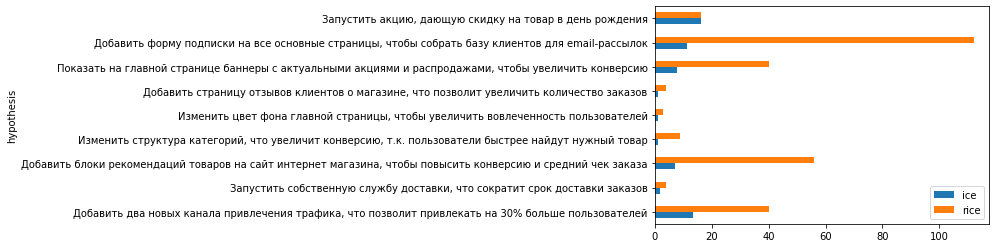

In [9]:
hypothesis.set_index('hypothesis')[['ice','rice']].plot(kind='barh');

Можно отметить, что использование параметра `reach` (охват пользователей), кардинально поменяло приоритетность гипотез.  Например, гипотеза №8 в `ICE` была самой приоритетной, а в `RICE` спустилась на пятое место (но при этом, разница в значениях практически не поменялась). Лишь гипотезы №6 и №4, не поменяли своих мест. 

## Анализ A/B-теста

### Предобработка данных

Создадим функцию для быстро анализа датасетов.

In [10]:
#функцие будем передавать датасет, в цикле будем перебирать столбцы
def dataset_info(dataset):
    count = 0
    dataset.columns = dataset.columns.str.lower().str.replace(' ','_') #тут приведем название столбцов к snake_case
    for column in dataset.columns:
        count += 1
        print('Название столбца:     ',column)                          #покажет как называется столбец
        print('Длина столбца:        ',len(dataset[column]))            #отобразит длину столбца
        print('Количество пропусков: ',dataset[column].isna().sum())    #отобразит количество пропусков
        print('Тип данных в столбце: ',dataset[column].dtype)           #покажет тип данных в столбце
        print('Пример значений:      ')                                 
        print(dataset[column].unique())                                 #отобразит уникальные значения
        print('----------------')
    print('Всего столбцов в датасете:', count)                          #подсчитаем количество столбцов в датасете
    print('Количество дубликатов: ',dataset.duplicated().sum())         #подсчитает количество строк-дубликатов

Выведем на экраны датасеты `orders` и `visitors`, запросим данные о значениях.

In [11]:
orders.head(10) #покажем 10 строк датасета

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


In [12]:
dataset_info(orders) #применим функцию, для анализа данных

Название столбца:      transactionid
Длина столбца:         1197
Количество пропусков:  0
Тип данных в столбце:  int64
Пример значений:      
[3667963787 2804400009 2961555356 ... 1807773912 1947021204 3936777065]
----------------
Название столбца:      visitorid
Длина столбца:         1197
Количество пропусков:  0
Тип данных в столбце:  int64
Пример значений:      
[3312258926 3642806036 4069496402 ...  370388673  573423106 2108080724]
----------------
Название столбца:      date
Длина столбца:         1197
Количество пропусков:  0
Тип данных в столбце:  object
Пример значений:      
['2019-08-15' '2019-08-16' '2019-08-01' '2019-08-22' '2019-08-17'
 '2019-08-23' '2019-08-02' '2019-08-18' '2019-08-24' '2019-08-03'
 '2019-08-25' '2019-08-28' '2019-08-19' '2019-08-06' '2019-08-26'
 '2019-08-29' '2019-08-04' '2019-08-20' '2019-08-09' '2019-08-07'
 '2019-08-30' '2019-08-05' '2019-08-27' '2019-08-21' '2019-08-08'
 '2019-08-10' '2019-08-31' '2019-08-11' '2019-08-12' '2019-08-13'
 '2019-08-14

В датасете `orders`: 

1197 строк, 5 колонок, пропусков нет, дубликатов строк нет, лишь в столбце `date` приведем к типу данных *datetime*.

In [13]:
visitors.head(10) #покажем 10 строк датасета

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


In [14]:
dataset_info(visitors) #применим функцию, для анализа данных

Название столбца:      date
Длина столбца:         62
Количество пропусков:  0
Тип данных в столбце:  object
Пример значений:      
['2019-08-01' '2019-08-02' '2019-08-03' '2019-08-04' '2019-08-05'
 '2019-08-06' '2019-08-07' '2019-08-08' '2019-08-09' '2019-08-10'
 '2019-08-11' '2019-08-12' '2019-08-13' '2019-08-14' '2019-08-15'
 '2019-08-16' '2019-08-17' '2019-08-18' '2019-08-19' '2019-08-20'
 '2019-08-21' '2019-08-22' '2019-08-23' '2019-08-24' '2019-08-25'
 '2019-08-26' '2019-08-27' '2019-08-28' '2019-08-29' '2019-08-30'
 '2019-08-31']
----------------
Название столбца:      group
Длина столбца:         62
Количество пропусков:  0
Тип данных в столбце:  object
Пример значений:      
['A' 'B']
----------------
Название столбца:      visitors
Длина столбца:         62
Количество пропусков:  0
Тип данных в столбце:  int64
Пример значений:      
[719 619 507 717 756 667 644 610 617 406 718 595 748 735 628 361 412 668
 502 575 646 609 468 395 621 722 711 594 577 490 699 713 581 509 770 707

В датасете `visitors`: 

62 строки, 3 колонки, пропусков нет, дубликатов строк нет, лишь в столбце `date` приведем к типу данных *datetime*.

In [15]:
#приведем данные в столбцах к типу datetime
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

Теперь посмотрим, не могут ли одни и теже пользователи быть в группе `А` и в группе `В` в датасете `orders`, выведем количество таких пользователей на экран.

In [16]:
double_users = orders.groupby('visitorid').agg({'group':'nunique'}).query('group > 1').reset_index()
#orderss = orders[orders["visitorid"].isin(abnormal_users["visitorid"]) == False]
double_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   visitorid  58 non-null     int64
 1   group      58 non-null     int64
dtypes: int64(2)
memory usage: 1.0 KB


Таких пользователей у нас 58, что составляет 4,84% от общего числа.

### Кумулятивная выручка по группам

Создадим массив уникальных пар значений дат и групп теста методом `drop_duplicates()`:

In [17]:
dates_groups = orders[['date','group']].drop_duplicates() #создаем массив уникальных пар значений дат и групп теста

In [18]:
dates_groups.head(5) #выведем 5 строк такого массива

,date,group
0,2019-08-15,B
2,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A


Соберем агрегированные кумулятивные по дням данные о заказах.
Получим строки таблицы `orders`, дата которых меньше или равна дате элемента из `datesGroups`, а группа теста равна группе из `datesGroups`:

* агрегируем значения;
* вычисляем максимальную дату, максимум группы;
* найдем число уникальных ID заказов и пользователей;
* подсчитаем сумму средних чеков;

применим методы к каждой строке датафрейма: `apply(axis=1)`, отсортируем результаты по столбцам `'date'` и `'group'`.

In [19]:
#получаем агрегированные кумулятивные по дням данные о заказах 
orders_aggregated = dates_groups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'],
                                                                       orders['group'] == x['group'])]
                                     .agg({'date' : 'max', 'group' : 'max', 
                                           'transactionid' : 'nunique', 'visitorid' : 'nunique', 
                                           'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [20]:
orders_aggregated.head(5) #выведем 5строк такого массива 

,date,group,transactionid,visitorid,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874


In [21]:
# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitors_aggregated = dates_groups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], 
                                                                           visitors['group'] == x['group'])]
                                         .agg({'date' : 'max', 'group' : 'max', 
                                               'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [22]:
visitors_aggregated.head(5)

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [23]:
#объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulative_data = orders_aggregated.merge(visitors_aggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
display(cumulative_data.head(5))

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


Теперь построим графики кумулятивной выручки по дням и группам A/B-тестирования, но сначала соберем два массива с выручкой для групп А и В.

In [24]:
#датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulative_data[cumulative_data['group']=='A'][['date','revenue', 'orders']]

#датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulative_data[cumulative_data['group']=='B'][['date','revenue', 'orders']]

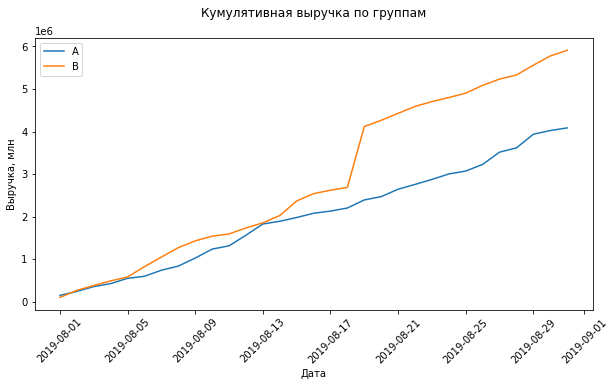

In [25]:
plt.figure(figsize=(10,5))
plt.title('Кумулятивная выручка по группам\n')
plt.xlabel('Дата')
plt.ylabel('Выручка, млн')
plt.xticks(rotation=45)
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.legend();

Выручка почти равномерно увеличивается в течение всего теста у всех групп. Можно отметить, что выручка группы `В` больше чем группы `А` на всем временном промежутке. У группы `А` график линейный, без явных всплесков и провалов. После 17 августа, график выручки группы `B` резко возрастает. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в группе.

### Кумулятивный средний чек по группам

Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов

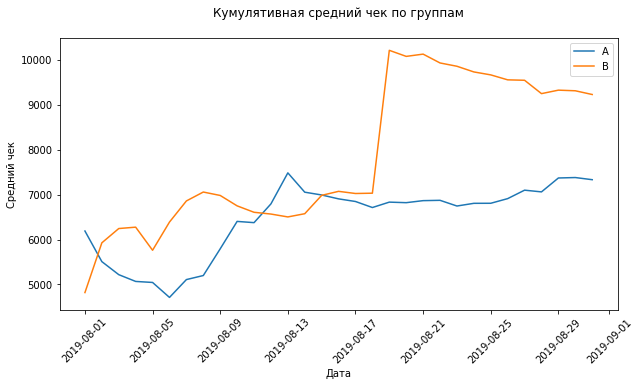

In [26]:
plt.figure(figsize=(10,5))
plt.title('Кумулятивная средний чек по группам\n')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.xticks(rotation=45)
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend();

А вот графики средних чеков неравномерны. Так вначале средний чек группы `А` был выше чем у группы `В`.Затем идет спад (6 августа) и резкий подъем с пиком в точке "13 августа", затем небольшой спад и стаблизиция на одном уровне до окончания исследования. 

У группы `В` старт был на очень низком уровне (5000) резкий подъем - стабилизация (3-4 августа) и небольшой провал (5 августа). Затем снова плавный подъем вкупе с плавным падением и 18 августа феноменальное резкое увеличение (с 7000 до 10000), лишь потом несколько падает и стабилизируется до конца исследования. Такое поведение среднего чека говорит нам о росте числа заказов в этой группе или о росте стоимости заказнных товаров.

### Относительное изменение кумулятивного среднего чека группы B к группе A

Построим график относительного различия для среднего чека.

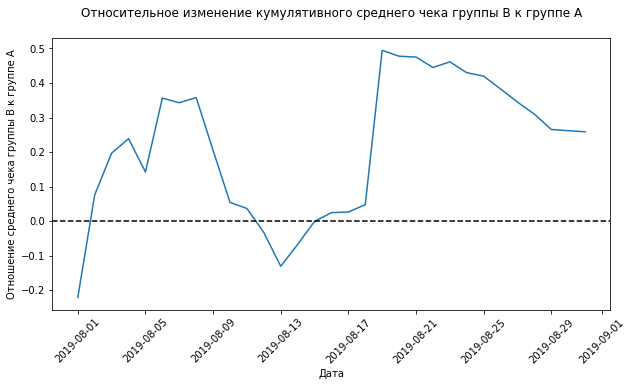

In [27]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', 
                                                   how='left', suffixes=['A', 'B'])

plt.figure(figsize=(10,5))
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A\n')
plt.xlabel('Дата')
plt.ylabel('Отношение среднего чека группы B к группе A')
plt.xticks(rotation=45)
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/
         (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

#добавляем ось X
plt.axhline(y=0, color='black', linestyle='--');

График различия между группами абсолютно нелинеен на протяжении всего периода, наблюдаем резкие спады и резкие росты. В нескольких точках различия близки к 0. По графику можно понять, что присутствуют крупные заказы и выбросы

### Кумулятивная конверсия по группам

Аналогично проанализируем график кумулятивной конверсии. Зададим масштаб осей методом `plt.axis()`. Передадим ему минимальное и максимальное значения оси x и минимальное и максимальное значения оси y. Для начала посчитаем кумулятивную конверсию, затем поделим ее на группы.

In [28]:
#считаем кумулятивную конверсию
cumulative_data['conversion'] = cumulative_data['orders']/cumulative_data['visitors']

#отделяем данные по группе A
cumulativeDataA = cumulative_data[cumulative_data['group']=='A']

#отделяем данные по группе B
cumulativeDataB = cumulative_data[cumulative_data['group']=='B']

Определим масштабы для осей

In [29]:
cumulative_data.describe()

,orders,buyers,revenue,visitors,conversion
count,62.000000,62.000000,6.200000e+01,62.000000,62.000000
mean,317.661290,291.903226,2.464491e+06,9883.306452,0.032292
std,172.828157,157.498031,1.659118e+06,5378.074717,0.002190
min,21.000000,20.000000,1.012170e+05,713.000000,0.029217
25%,177.750000,162.000000,1.096278e+06,5437.500000,0.030190
50%,319.500000,293.500000,2.165968e+06,10030.000000,0.032819
75%,459.250000,421.000000,3.856338e+06,14259.000000,0.034055
max,640.000000,586.000000,5.907760e+06,18916.000000,0.036856


Нас интересует столбец conversion и его максимальные и минимальные значения

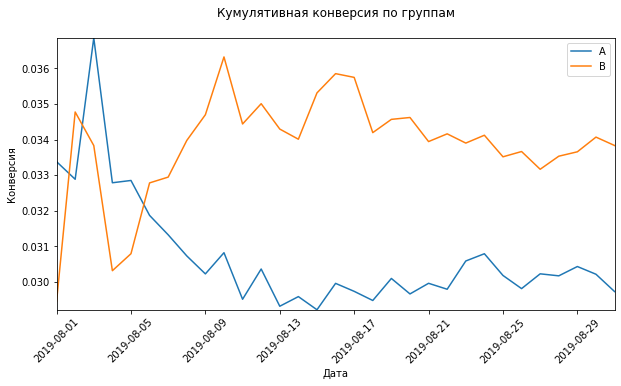

In [30]:
plt.figure(figsize=(10,5))
plt.title('Кумулятивная конверсия по группам\n')
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.xticks(rotation=45)
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

#зададим масштаб осей
plt.axis([cumulative_data['date'].min(), cumulative_data['date'].max(), 0.029217, 0.036856]);

Графики не обладают симметрией. Изначально конверсия группы `А` была на высоком уровне (относительно группы `В`), просев, она выросла (пик 3 августа), но затем ее постиг резкий спад и стаблизация на уровне не выше 0,031.

Группа В начав с достаточно низкого уровня, также достигает пика (2 августа) резко проседает (4 августа) и начинает увернный рост, дальше проходит стаблизация показателей на уровне 0,033-0,036.

В целом, кумулятивная конверсия выше у группы `В`, чем у группы `А`.

### Относительное изменение кумулятивной конверсии группы B к группе A

Построим график относительного различия кумулятивных конверсий, для этого соединим две таблицы конверсий по дате.

In [31]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], 
                                                                           left_on='date', right_on='date', how='left', 
                                                                           suffixes=['A', 'B'])

In [32]:
mergedCumulativeConversions.head(5) #выведем 5 строк такой соединенной таблицы

,date,conversionA,conversionB
0,2019-08-01,0.033380,0.029453
1,2019-08-02,0.032885,0.034776
2,2019-08-03,0.036856,0.033833
3,2019-08-04,0.032787,0.030315
4,2019-08-05,0.032851,0.030793


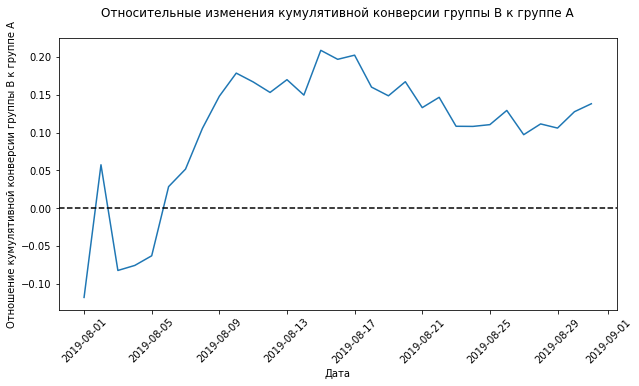

In [33]:
plt.figure(figsize=(10,5))
plt.title('Относительные изменения кумулятивной конверсии группы B к группе A\n')
plt.xlabel('Дата')
plt.ylabel('Отношение кумулятивной конверсии группы B к группе A')
plt.xticks(rotation=45)
plt.plot(mergedCumulativeConversions['date'], (mergedCumulativeConversions['conversionB']/
                                        (mergedCumulativeConversions['conversionA']) - 1));
plt.axhline(y=0, color='black', linestyle='--');

Так как данный график имеет прямую зависимоть от рассмотренных ранее двух, общие выводы он содержит такие же. В целом можно выделить рост конверсии группы `В` отсносительно `А` до 2 августа, с падением 3 августа и наичнающимся бурным ростом 5 августа.

### Количество заказов по пользователям

Составим гистограмму распределения стоимостей заказов, но для начала подготовим необходимые данные.

In [34]:
#сгруппируем пользователей и количество заказов
orders_by_users = (
    orders.drop(['date', 'revenue', 'group'], axis=1)
    .groupby('visitorid', as_index=False)
    .agg({'transactionid':'nunique'})
)
orders_by_users.columns = ['user_id', 'orders']

In [35]:
#выведм на экран массив, с сортировкой в порядке убывания
orders_by_users.sort_values(by = 'orders', ascending = False).head(10) 

,user_id,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


Мы видим пользователей, которые совершали по 11, 9 и 8, затем количество резко спускается до 5. Построим гистрограмму распределения количества заказов на одного пользователя.

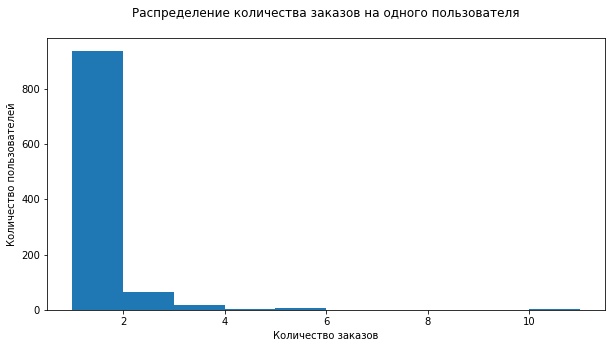

In [36]:
plt.figure(figsize=(10,5))
plt.ylabel('Количество пользователей')
plt.xlabel('Количество заказов')
plt.title('Распределение количества заказов на одного пользователя\n')
plt.hist(orders_by_users['orders']);
plt.show()

Как можем увидеть, пользователи совершают 1-2 заказа, реже 3-4, и сильно реже больше 5 заказов. Построим точечную диаграмму для того, чтобы увидеть распределение наглядней.

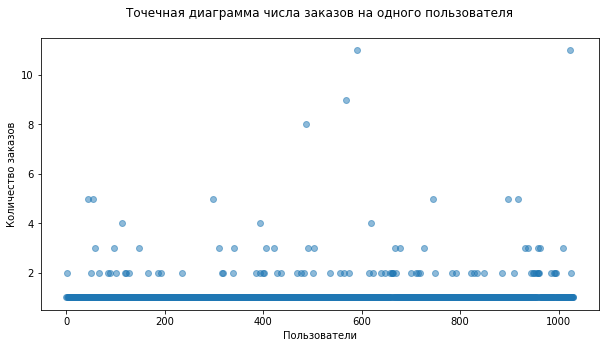

In [37]:
x_values = pd.Series(range(0,len(orders_by_users)))
plt.figure(figsize=(10,5))
plt.ylabel('Количество заказов')
plt.xlabel('Пользователи')
plt.title('Точечная диаграмма числа заказов на одного пользователя\n')
plt.scatter(x_values, orders_by_users['orders'], alpha=0.5);

Большинство пользователей совершали 1 заказ (непрерывная линия показывает это), чуть больше пользователей делали 2 заказа, порядка 17 пользоватлей делали 3 заказа, 3 пользователя - 4, по одному пользователю сделали 8 и 9 заказов, и 2 пользователя по 11. Можно предположить, что пользователи совершившие больше 5 заказов, можно классифицировать как аномалии. Но чтобы точно ответить, определим 95 и 99 перцентили. 

In [38]:
np.percentile(orders_by_users['orders'], [95,99])

array([2., 4.])

Из этого следует, что примерно 5% пользователей сделали больше 2 заказов, и 1% пользователей сделали больше 4 заказов.
Разумно выбрать 2 заказа на одного пользователя за нижнюю границу числа заказов, и убрать аномальных пользователей по ней.

### Количество заказов по стоимости

Теперь посмотрим на стоимость заказов и их количество, визуализируем это:

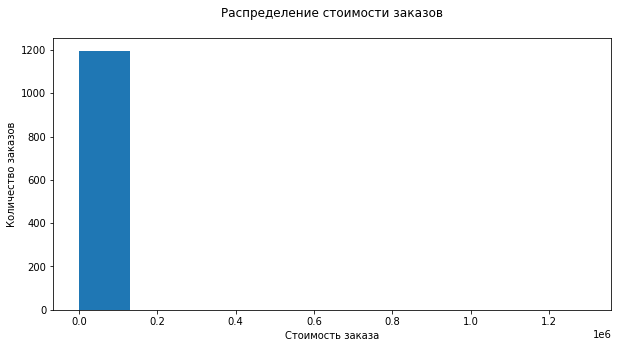

In [39]:
plt.figure(figsize=(10,5))
plt.ylabel('Количество заказов')
plt.xlabel('Стоимость заказа')
plt.title('Распределение стоимости заказов\n')
plt.hist(orders['revenue']);

В нашем случае диаграмма получилась не совсем читабельна, невозможно сделать корректные выводы однозначно. Построим точечную диаграмму:

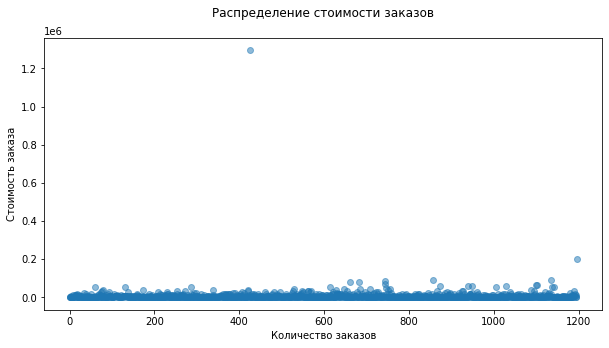

In [40]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(10,5))
plt.xlabel('Количество заказов')
plt.ylabel('Стоимость заказа')
plt.title('Распределение стоимости заказов\n')
plt.scatter(x_values, orders['revenue'], alpha=0.5);

А вот на этой диаграмме видно явный выброс, это заказ стоимость 1,3 млн. Также немного выбивается заказ стоимость 200 тысяч, в среднем, даже большие заказы не превышают 100 тысяч. Определим 95 и 99 перцентили среднего чека в выборке, для определения аномальных пользователей. Увеличим детализацию по оси Y, ограничение поставим на сумме заказа 100 000 единиц.

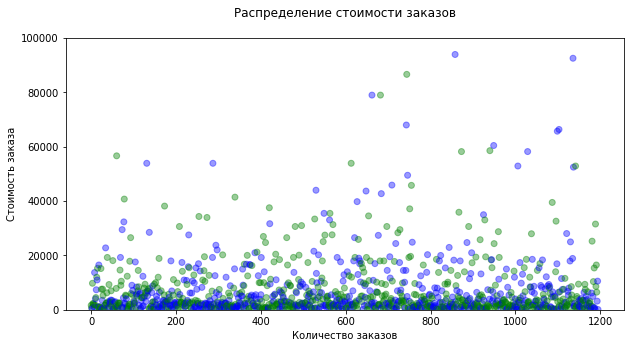

In [41]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(10,5))
plt.xlabel('Количество заказов')
plt.ylabel('Стоимость заказа')
plt.title('Распределение стоимости заказов\n')
plt.ylim([0,100000]) #увеличиваем детализацию
plt.scatter(x_values, orders['revenue'], c=orders['group'].map({'A': 'blue', 'B': 'green'}), alpha=0.4);

При ограничении детализации (100000 единиц за заказ), можно увидеть, что в основной своей массе, частыми событиями можно считать заказы до 10000 единиц. В тоже время редкими событиями можно считать заказы, примерно, свыше 20000 единиц.
Для проверки нашей теории, определим с помощью 95 и 99 перцентилей, пределы заказов пользователей.

In [42]:
np.percentile(orders['revenue'], [95,99])

array([28000. , 58233.2])

Это говорит нам, что лишь 5% пользователей совершают покупку на сумму больше 28000, и лишь 1% - на сумму больше 58233,2 единиц. За точку отсчета возмем сумму покупки - 28000 единиц, а все остальное будем считать аномалией.

### Подготовка данных

В предыдущих шагах мы увидели, что существует аномальные выбросы (это сумма заказа и колчиество заказов) в наших данных. Мы определили для них границу. Для начала, подсчитаем показатели для данных с такими "аномальными" пользователями, затем без таких. В нескольких шагах создадим большую обощенную таблицу.

Определим для каждой группы, количество пользователей в день:

In [43]:
#определим число пользователей в каждый день для группы А
visitors_A_daily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitors_A_daily.columns = ['date', 'visitors_per_date_A']

In [44]:
#определим число пользователей в каждый день для группы В
visitors_B_daily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitors_B_daily.columns = ['date', 'visitors_per_date_B']

Найдем количество кумулятивных пользователей в день в разрезе групп:

In [45]:
#кумулятивное число пользователей за дни группы А
visitors_A_cummulative = visitors_A_daily.apply(
    lambda x: visitors_A_daily[visitors_A_daily['date'] <= x['date']]
    .agg({'date': 'max', 'visitors_per_date_A': 'sum'}), axis=1,
)
visitors_A_cummulative.columns = ['date', 'visitors_cummulative_A']

In [46]:
#кумулятивное число пользователей за дни группы В
visitors_B_cummulative = visitors_B_daily.apply(
    lambda x: visitors_B_daily[visitors_B_daily['date'] <= x['date']]
    .agg({'date': 'max', 'visitors_per_date_B': 'sum'}), axis=1,
)
visitors_B_cummulative.columns = ['date', 'visitors_cummulative_B']

Найдем количество заказов в день и выручку для каждой группы:

In [47]:
#количество заказов и сумма выручки за дни группы А
orders_A_daily = (orders[orders['group'] == 'A'][['date', 'transactionid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionid':pd.Series.nunique, 'revenue':'sum'})
    )
orders_A_daily.columns = ['date', 'orders_per_date_A', 'revenue_per_date_A']

In [48]:
#количество заказов и сумма выручки за дни группы В
orders_B_daily = (orders[orders['group'] == 'B'][['date', 'transactionid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionid':pd.Series.nunique, 'revenue':'sum'})
    )
orders_B_daily.columns = ['date', 'orders_per_date_B', 'revenue_per_date_B']

Также найдем кумулятивное количество заказов и выручки в день:

In [49]:
#кумулятивное количество заказов и выручки за день группы А
orders_A_cummulative = orders_A_daily.apply(
    lambda x: orders_A_daily[orders_A_daily['date'] <= x['date']]
    .agg({'date':'max', 'orders_per_date_A':'sum', 'revenue_per_date_A':'sum'}), axis=1)
orders_A_cummulative.columns = ['date', 'orders_cummulative_A', 'revenue_cummulative_A']

In [50]:
#кумулятивное количество заказов и выручки за день группы В
orders_B_cummulative = orders_B_daily.apply(
    lambda x: orders_B_daily[orders_B_daily['date'] <= x['date']]
    .agg({'date':'max', 'orders_per_date_B':'sum', 'revenue_per_date_B':'sum'}), axis=1)
orders_B_cummulative.columns = ['date', 'orders_cummulative_B', 'revenue_cummulative_B']

Все рассчитанные данные "склеим" в одну большую сводную таблицу:

In [51]:
big_df = (orders_A_daily
    .merge(orders_B_daily, left_on='date', right_on='date', how='left')
    .merge(orders_A_cummulative, left_on='date', right_on='date', how='left')
    .merge(orders_B_cummulative, left_on='date', right_on='date', how='left')
    .merge(visitors_A_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_B_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_A_cummulative, left_on='date', right_on='date', how='left')
    .merge(visitors_B_cummulative, left_on='date', right_on='date', how='left')
)

In [52]:
big_df.head(5) #выведем на экран обощенную таблицу

,date,orders_per_date_A,revenue_per_date_A,orders_per_date_B,revenue_per_date_B,orders_cummulative_A,revenue_cummulative_A,orders_cummulative_B,revenue_cummulative_B,visitors_per_date_A,visitors_per_date_B,visitors_cummulative_A,visitors_cummulative_B
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


### Различия в конверсии между группами по «сырым» данным

Объявим переменные `sample_A` и `sample_B`, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.

In [61]:
orders_by_users_A = (orders[orders['group']=='A']
                     .groupby('visitorid', as_index=False)
                     .agg({'transactionid':pd.Series.nunique})
                    )
orders_by_users_A.columns = ['visitorid', 'orders']

orders_by_users_B = (orders[orders['group']=='B']
                     .groupby('visitorid', as_index=False)
                     .agg({'transactionid':pd.Series.nunique})
                    )
orders_by_users_B.columns = ['visitorid', 'orders']

sample_A = pd.concat([orders_by_users_A['orders'],
                      pd.Series(0, index=np.arange(big_df['visitors_per_date_A'].sum() - len(orders_by_users_A['orders'])), name='orders')],axis=0)

sample_B = pd.concat([orders_by_users_B['orders'],
                      pd.Series(0, index=np.arange(big_df['visitors_per_date_B'].sum() - len(orders_by_users_B['orders'])), name='orders')],axis=0)

Определим гипотезы:

**H₀** - статистически значимых различий в конверсии между группами нет;

**H₁** - статистически значимые различия в конверсии между группами есть.

In [54]:
print("alpha =",0.05)
print("p-value = {0:.3f}".format(stats.mannwhitneyu(sample_A, sample_B, alternative = 'two-sided')[1]))
print("Относительный показатель 'B' и 'A' = {0:.3f}".format(sample_B.mean()/sample_A.mean()-1)) 

alpha = 0.05
p-value = 0.017
Относительный показатель 'B' и 'A' = 0.138


p-value (0.017) меньше 0.05. Из этого следует, что мы вынуждены **отвергнуть** нулеувю гипотезу об отсутствии значимых различий в ковнерсии между группами.  То есть, по «сырым» данным различия в конверсии групп `A` и `B` есть. А относительное преимущество группы `B` над `A` равно 13.8%.

### Различия в среднем чеке заказа между группами по «сырым» данным

Теперь проверим различия в среднем чеке между группами по необработанным данным.

Гипотезы буду выглядеть следующим образом:

**H₀** - статистически значимых различий в среднем чеке между группами нет;

**H₁** - статистически значимые различия в среднем чеке между группами есть.

In [55]:
print("alpha =",0.05)
print("p-value = {0:.3f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1], alternative="two-sided"))
print("Относительный показатель 'B' и 'A' = {0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

alpha = 0.05
p-value = 0.729
Относительный показатель 'B' и 'A' = 0.259


p-value (0.729) значительно больше 0.05. Следовательно, мы **не можем отвергнуть** нулевую гипотезу, об отсуствии различий в среднем чеке между группами. Можно сделать вывод, что по необработанными данным, средние чеки схожи. Невозможно не заметить, что при неотвергнутой гипотезе, мы имеем преимещуество среднего чека группы `В` над `А` в размере 25,9%.

### "Чистим" данные

Вспомним - из предыдущих пунктов мы приняли за аномальных пользователей тех, кто совершил 3 и больше заказов или совершил заказ дороже 28 000 единиц. Сделаем срезы пользователей с числом заказов больше 2 — `usersWithManyOrders` и пользователей, совершивших заказы дороже 28 000 — `usersWithExpensiveOrders`. Объединим их в таблице `abnormal_users`. Узнаем, сколько всего аномальных пользователей методом `shape()`.

In [56]:
usersWithManyOrders = pd.concat([orders_by_users_A[orders_by_users_A['orders'] > 2]['visitorid'], 
                                 orders_by_users_B[orders_by_users_B['orders'] > 2]['visitorid']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > np.percentile(orders['revenue'], [95])[0]]['visitorid']
abnormal_users = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormal_users.head(5))
print('Таких пользователей = ',abnormal_users.shape)

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
Name: visitorid, dtype: int64
Таких пользователей =  (74,)


Теперь создадим два отфильтрованных массива, для групп `А` и `В`.

In [57]:
sample_A_filtered = pd.concat(
    [orders_by_users_A[np.logical_not(orders_by_users_A['visitorid'].isin(abnormal_users))]['orders'],
        pd.Series(0, index=np.arange(big_df['visitors_per_date_A'].sum() - len(orders_by_users_A['orders'])),
            name='orders',),], axis=0,)

sample_B_filtered = pd.concat(
    [orders_by_users_B[np.logical_not(orders_by_users_B['visitorid'].isin(abnormal_users))]['orders'],
        pd.Series(0, index=np.arange(big_df['visitors_per_date_B'].sum() - len(orders_by_users_B['orders'])),
            name='orders',),], axis=0,)

### Различия в конверсии между группами по «очищенным» данным

Гипотезы сформируем так:

**H₀** - статистически значимых различий в конверсии между группами нет;

**H₁** - статистически значимые различия в конверсии между группами есть.

In [58]:
print("alpha =",0.05)
print("p-value = {0:.3f}".format(stats.mannwhitneyu(sample_A_filtered, sample_B_filtered)[1], alternative = 'two-sided'))
print("Относительный показатель 'B' и 'A' = {0:.3f}".format(sample_B_filtered.mean()/sample_A_filtered.mean()-1)) 

alpha = 0.05
p-value = 0.013
Относительный показатель 'B' и 'A' = 0.173


p-value (0.01) меньше 0.05. Из этого следует, что мы вынуждены **отвергнуть** нулеувю гипотезу об отсутствии значимых различий в конверсии между группами. То есть, по «чистым» данным различия в конверсии групп A и B есть. А относительное преимущество группы B над A равно 17.3% (по неочищенным данным, данный показатель на уровне 13.8%).

### Различия в среднем чеке заказа между группами по «очищенным» данным

Гипотезы звучат так:

**H₀** - статистически значимых различий в средних чеках между группами нет;

**H₁** - статистически значимые различия в средних чеках между группами есть.

In [59]:
print("alpha =",0.05)
print("p-value = {0:.3f}".format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorid'].isin(abnormal_users)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorid'].isin(abnormal_users)))]['revenue'], alternative = 'two-sided')[1]))

print("Относительный показатель 'B' и 'A' = {0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorid'].isin(abnormal_users)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorid'].isin(abnormal_users)))]['revenue'].mean() - 1)) 

alpha = 0.05
p-value = 0.738
Относительный показатель 'B' и 'A' = -0.020


In [60]:
orders[orders['revenue']>1000000] #проверим к какой группе принадлежит самый большой заказ

,transactionid,visitorid,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B


p-value (0.738) больше 0.05. Следовательно, мы **не можем отвергнуть** нулевую гипотезу, об отсуствии различий в среднем чеке между группами. По очищенным данным можно увидеть, что средний чек группы `В` оказался ниже среднего чека группы `А` (в то время как, по "сырым" данным он был больше на 25,9%). На это повлиял самый большой заказ на 1,3 млн единиц, который не попал в "чистую" группу.

## Вывод

**Используемые данные:**

критических замечаний нет. Пропусков данных не наблюдается, дубликатов строк не обнаружено. Лишь даты привели к типу данных *datetime*.

**Приоритизация гипотез:**

мы применили фреймворки *ICE* и *RICE*. Можно отметить, что использование параметра reach (охват пользователей), кардинально поменяло приоритетность гипотез. Например, гипотеза №8 (*Запустить акцию, дающую скидку на товар в день рождения*) в ICE была самой приоритетной, а в RICE спустилась на пятое место (но при этом, разница в значениях практически не поменялась). Лишь гипотезы №6 (*Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию*) и №4 (*Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей*), не поменяли своих мест.

в *RICE* лидирующие гипотезы:
* Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок;
* Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа.

в *ICE* лидирующие гипотезы:
* Запустить акцию, дающую скидку на товар в день рождения;
* Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей.

**Кумулятивные данные:**
* Кумулятивная **выручка** почти равномерно увеличивается в течение всего теста у всех групп. Можно отметить, что выручка группы `В` больше чем группы `А` на всем временном промежутке. У группы `А` график линейный, без явных всплесков и провалов. После 17 августа, график выручки группы `B` резко возрастает. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в группе.


* А вот графики **средних чеков** неравномерны. Так вначале средний чек группы `А` был выше чем у группы `В`.Затем идет спад (6 августа) и резкий подъем с пиком в точке "13 августа", затем небольшой спад и стаблизиция на одном уровне до окончания исследования. У группы `В` старт был на очень низком уровне (5000) резкий подъем - стабилизация (3-4 августа) и небольшой провал (5 августа). Затем снова плавный подъем вкупе с плавным падением и 18 августа феноменальное резкое увеличение (с 7000 до 10000), лишь потом несколько падает и стабилизируется до конца исследования. Такое поведение среднего чека говорит нам о росте числа заказов в этой группе или о росте стоимости заказнных товаров.


* **Конверсия** выше у группы В, чем у группы А.

**Количество заказов:**
* Существуют пользователи, сделавшие 8,9 и 11 заказов, но в целом, основная масса пользователей делает 1-2 заказа, реже 3-4, 5 и выше - очень редкие события. Выяснили, что примерно 5% пользователей сделали больше 2 заказов, и 1% пользователей сделали больше 4 заказов.


* Лишь 5% пользователей совершают покупку на сумму больше 28000, и лишь 1% - на сумму больше 58233,2 единиц. Однако, существуют заказы около 200 тысяч, в среднем, даже большие заказы не превышают 100 тысяч. Но есть достаточно редкое событие - 1 заказ на 1,3 млн.

**Проверка гипотез:**

По сырым данным:
* различия в конверсии между группами - есть. У группы `В` конверсия выше группы `А` на 13.8%.

* различия в среднем чеке между группами - нет. Хотя есть преимущество группы `В` над группой `А` размере 25,9%.

По очищенным данным:
* различия в конверсии между группами - есть. Относительное преимущество группы `B` над `A` равно 17.3%.

* различия в среднем чеке между группами - нет. Тут уже показатель группы `В` ниже на 2% относительно группы `А`. На это повлиял самый большой заказ на 1,3 млн единиц, который не попал в "чистую" группу.

**Решение по А/В тесту:**

Остановить тестирование. Признать группу `В` лидирующей. У группы `B` выше конверсия, чем у группы `A`, при том, что по среднему чеку обе группы (и по "чистым" и по "сырым" данным) можно рассматривать как равнозначные.